# Question 1: CNN using Tensorflow

1. Load the cifar 100 dataset. Use the 'coarse' labels.
https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar100/load_data



In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses, datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import History
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data(label_mode='coarse')

In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0

2. Check if there are 20 labels in y_train using np.unique().

In [4]:
print(len(np.unique(y_train)))

20


3. More information about the dataset could be found here : https://www.cs.toronto.edu/~kriz/cifar.html . Plot the first 25 images from both the train and test data.

class_names = ["aquatic mammals","fish","flowers","food containers","fruit and vegetables","household electrical devices",
"household furniture","insects","large carnivores","large man-made outdoor things","large natural outdoor scenes","large omnivores and herbivores","medium-sized mammals","non-insect invertebrates","people","reptiles","small mammals","trees","vehicles 1","vehicles 2"]

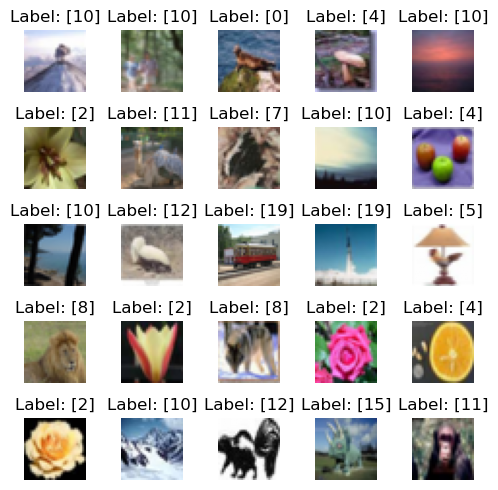

In [5]:
fig, axes = plt.subplots(5, 5, figsize=(5, 5))
axes = axes.flatten()
for i in range(25):
    axes[i].imshow(x_test[i], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title('Label: {}'.format(y_test[i]))
plt.tight_layout()
plt.show()

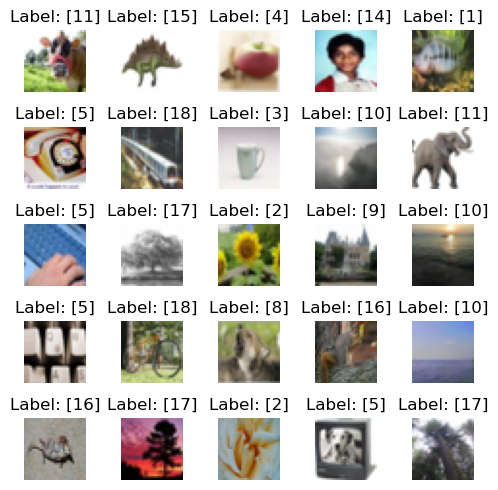

In [6]:
fig, axes = plt.subplots(5, 5, figsize=(5, 5))
axes = axes.flatten()
for i in range(25):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title('Label: {}'.format(y_train[i]))
plt.tight_layout()
plt.show()

Import layers and models from tensorflow.keras and build a Sequential Model with Convulation layers at the base and Fully Connected Layers at the top.

We used the same model in the Example Notebook for MNIST and achieved only 41% accuracy on the test data.

We then used the following architecture to achieve 45% accuracy on the test data:

1. Conv Layer : 32 filters each of 3x3.
2. Conv Layer : 64 filters each of 3x3.
3. Max pool layer of 2x2 kernel size.
4. Conv Layer : 64 filters each of 2x2.
5. Conv Layer : 64 filters each of 2x2.
6. Max pool layer of 2x2 kernel size.
7. Flatten.
8. Dense of 80 neurons.
9. Dense of 50 neurons.
10. Dense of 20 neurons.

To train this, it required 40 minutes.

You should come up with your own architecture.

In [7]:
def create_model():
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2), strides=(2, 2)),
        
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2), strides=(2, 2)),
        
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2), strides=(2, 2)),
        
        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dense(20, activation='softmax')
    ])
    
    return model

In [8]:
model = create_model()
model.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])
model.summary()

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8, 8, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │          10,260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,761,940 (21.98 MB)

 Trainable params: 5,758,996 (21.97 MB)

 Non-trainable params: 2,944 (11.50 KB)

In [9]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 567s 360ms/step - accuracy: 0.3027 - loss: 2.3760 - val_accuracy: 0.4577 - val_loss: 1.7627
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 550s 352ms/step - accuracy: 0.5413 - loss: 1.4653 - val_accuracy: 0.4406 - val_loss: 1.8281
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 551s 352ms/step - accuracy: 0.6490 - loss: 1.1068 - val_accuracy: 0.6093 - val_loss: 1.2525
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 550s 352ms/step - accuracy: 0.7474 - loss: 0.7915 - val_accuracy: 0.5342 - val_loss: 1.5952
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 552s 353ms/step - accuracy: 0.8373 - loss: 0.5104 - val_accuracy: 0.5645 - val_loss: 1.6476
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 550s 352ms/step - accuracy: 0.9172 - loss: 0.2651 - val_accuracy: 0.6271 - val_loss: 1.4785
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 552s 353ms/step - accuracy: 0.9407 - loss: 0.1824 - val_accuracy: 0.5442 - val_loss: 2.1361
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 554s 354ms/step - ac

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 97ms/step - accuracy: 0.6214 - loss: 1.9073
Test accuracy: 0.6182000041007996


In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 98ms/step - accuracy: 0.6214 - loss: 1.9073
Test accuracy: 0.6182000041007996


Plot the training accuracy vs number of epochs graph. Print the test accuracy.

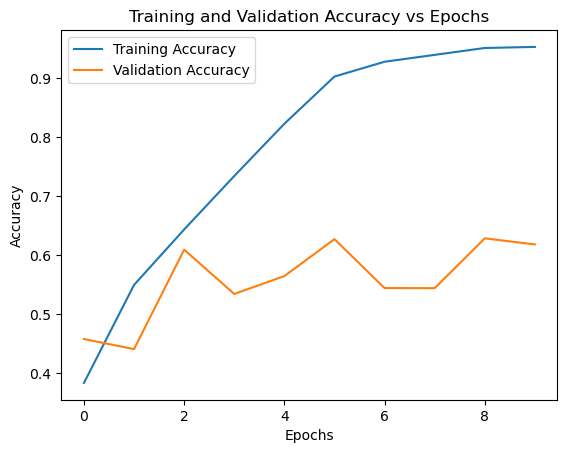

In [12]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs Epochs')
plt.legend()
plt.show()

Check this website : https://paperswithcode.com/sota/image-classification-on-cifar-100 . It contains information about the best performing models. The top models are of transformers. We can check the ResNet-18 model. It consists of 18 layers. The architecture could be in the internet. Use ChatGPT if necessary. Training it for 10 epochs will take approximately 1 hour.

The layers are :

1. Conv layer : 64 kernels, 7x7 . strides = (2,2). activation =none.
2. Batch Normalization.
3. Relu Activation.
4. MaxPooling 3x3 . stride =2x2.
5. Conv layer : 64 kernels, 3x3 . strides = (1,1). activation =none.
6. Batch Normalization.
7. Relu Activation.
8. Same as 5 but 128 kernels.
9. Batch Normalization.
10. Relu Activation.
11. Same as 5 but 256 kernels.
12. Batch Normalization.
13. Relu Activation.
14. Same as 5 but 512 kernels.
15. Batch Normalization.
16. Relu Activation.
17. Global Average Pooling.
18. Dense layer of 20 neurons.





In [13]:
def resnet_block(inputs, filters, kernel_size, strides, activation=True):
    x = layers.Conv2D(filters, kernel_size, strides=strides, padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x)
    if activation:
        x = layers.ReLU()(x)
    return x

def create_resnet18():
    inputs = layers.Input(shape=(32, 32, 3))

    # Initial Conv Layer
    x = resnet_block(inputs, 64, (7, 7), strides=(2, 2), activation=False)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Residual Blocks
    x = resnet_block(x, 64, (3, 3), strides=(1, 1))
    x = resnet_block(x, 64, (3, 3), strides=(1, 1))
    
    x = resnet_block(x, 128, (3, 3), strides=(2, 2))
    x = resnet_block(x, 128, (3, 3), strides=(1, 1))
    
    x = resnet_block(x, 256, (3, 3), strides=(2, 2))
    x = resnet_block(x, 256, (3, 3), strides=(1, 1))
    
    x = resnet_block(x, 512, (3, 3), strides=(2, 2))
    x = resnet_block(x, 512, (3, 3), strides=(1, 1))

    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(100, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

In [14]:
model = create_resnet18()
model.compile(optimizer=optimizers.Adam(),
              loss=losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 64)          │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 64)            │          36,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 8, 8, 64)            │          36,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 4, 4, 128)           │          73,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 4, 4, 128)           │         147,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,787,492 (18.26 MB)

 Trainable params: 4,783,396 (18.25 MB)

 Non-trainable params: 4,096 (16.00 KB)

In [15]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 233s 145ms/step - accuracy: 0.2234 - loss: 2.6071 - val_accuracy: 0.2828 - val_loss: 2.4033
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 229s 146ms/step - accuracy: 0.3681 - loss: 2.0419 - val_accuracy: 0.3341 - val_loss: 2.1934
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 227s 145ms/step - accuracy: 0.4372 - loss: 1.7938 - val_accuracy: 0.3633 - val_loss: 2.1395
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 229s 146ms/step - accuracy: 0.4934 - loss: 1.6056 - val_accuracy: 0.4697 - val_loss: 1.7143
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 227s 145ms/step - accuracy: 0.5447 - loss: 1.4472 - val_accuracy: 0.4737 - val_loss: 1.7317
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 228s 146ms/step - accuracy: 0.5880 - loss: 1.2942 - val_accuracy: 0.4340 - val_loss: 1.9788
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 231s 148ms/step - accuracy: 0.6267 - loss: 1.1698 - val_accuracy: 0.5045 - val_loss: 1.6673
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 238s 152ms/step - ac

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.5187 - loss: 1.8245
Test accuracy: 0.5133000016212463


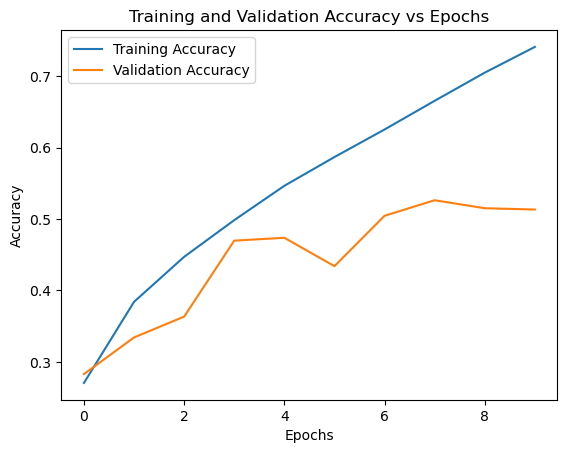

In [17]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs Epochs')
plt.legend()
plt.show()

# Question 2: Rising Fuel Prices
In a regression problem, the aim is to predict the output of a continuous value, like a price or a probability.

In this question, we will be using the classic Auto MPG dataset and build a model to predict the fuel efficiency of the late-1970s and early 1980s automobiles. To do this, we will provide the models with a description of many automobiles from that time period. This description includes attributes like cylinders, displacement, horsepower, and weight.

In [18]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Load the data.

In [19]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']
dataset = pd.read_csv(url, names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,NaN
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,NaN
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,NaN
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,NaN
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,NaN


Get an overview of the data.

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car Name      0 non-null      float64
dtypes: float64(6), int64(3)
memory usage: 28.1 KB


Drop the null values and redundant columns. Or you may do imputation of null values, if you are familiar with that.

Search for dropping rows with null values in a Pandas dataframe.

In [21]:
print(dataset.isnull().sum())
dataset = dataset.drop(columns=['Car Name'])

dataset['Horsepower'].fillna(dataset['Horsepower'].mean(), inplace=True)

MPG               0
Cylinders         0
Displacement      0
Horsepower        6
Weight            0
Acceleration      0
Model Year        0
Origin            0
Car Name        398
dtype: int64


##Handling Non-Numeric Data
The origin column contains "Label Encoded Values". More about it [here](https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/).

We want to convert it into a [One-Hot-Encoded](https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python//) value.

In [22]:
# Convert categorical 'Origin' column to one-hot encoded features : pd.get_dummies ...
print(dataset['Origin'].nunique())
dataset = pd.get_dummies(dataset, columns=['Origin'])
dataset.head()

3


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_1,Origin_2,Origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,True,False,False
1,15.0,8,350.0,165.0,3693.0,11.5,70,True,False,False
2,18.0,8,318.0,150.0,3436.0,11.0,70,True,False,False
3,16.0,8,304.0,150.0,3433.0,12.0,70,True,False,False
4,17.0,8,302.0,140.0,3449.0,10.5,70,True,False,False


In [23]:
y = dataset['MPG']
x = dataset.drop(columns = ['MPG'])

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Scaling the Data
It is evident that the features vary a lot by a quick statistical survey. To ensure that our model generalizes over a large variety of vehicles, we need to Normalize the data using the *scaler.fit_transform*.

In [25]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Building the Model

Build a Fully Connected Neural Network with 3-4 Dense layers. You may decide the number of neuron in each layers.

Fit the model on the train data and evaluate the predictions on test data.

Use Adam optimizer and MeanSquaredError cost function. The lower the error, the better the model. Try to get MSE < 6 on the test data.

In [26]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  
])
model.compile(optimizer=Adam(), loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 590.6581 - val_loss: 557.6808
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 547.5502 - val_loss: 505.1953
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 488.4195 - val_loss: 431.4849
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 424.5071 - val_loss: 330.7171
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 293.3198 - val_loss: 210.2574
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 168.1133 - val_loss: 99.6221
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 86.0651 - val_loss: 49.1845
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 45.8435 - val_loss: 42.9721
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 36.5074 - val_loss: 25.5346
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21.0586 - val_loss: 17.3888
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17.3581 - val_loss: 13.5534
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step -

In [28]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) on test data:", mse)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Mean Squared Error (MSE) on test data: 4.397029831296755


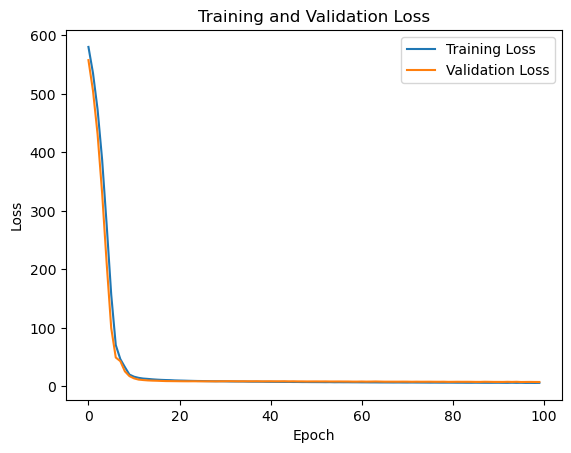

In [29]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()